<a href="https://colab.research.google.com/github/lmassaron/ml4dummies_3ed/blob/main/ML4D3E_10_starting_with_simple_learners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

repository = "https://github.com/lmassaron/ml4dummies_3ed/"
release = "releases/download/v1.0/"
filename = repository + release + "tennis.csv"
tennis = pd.read_csv(filename)

In [2]:
X = tennis[["outlook", "temperature",
            "humidity", "wind"]]
X = pd.get_dummies(X)
y = tennis.play

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X, y)

DecisionTreeClassifier(random_state=0)

In [4]:
!pip -q install dtreeviz

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/usr/local/lib/python3.11/dist-packages/dtreeviz/models/shadow_decision_tree.py:291: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7078: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7093: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


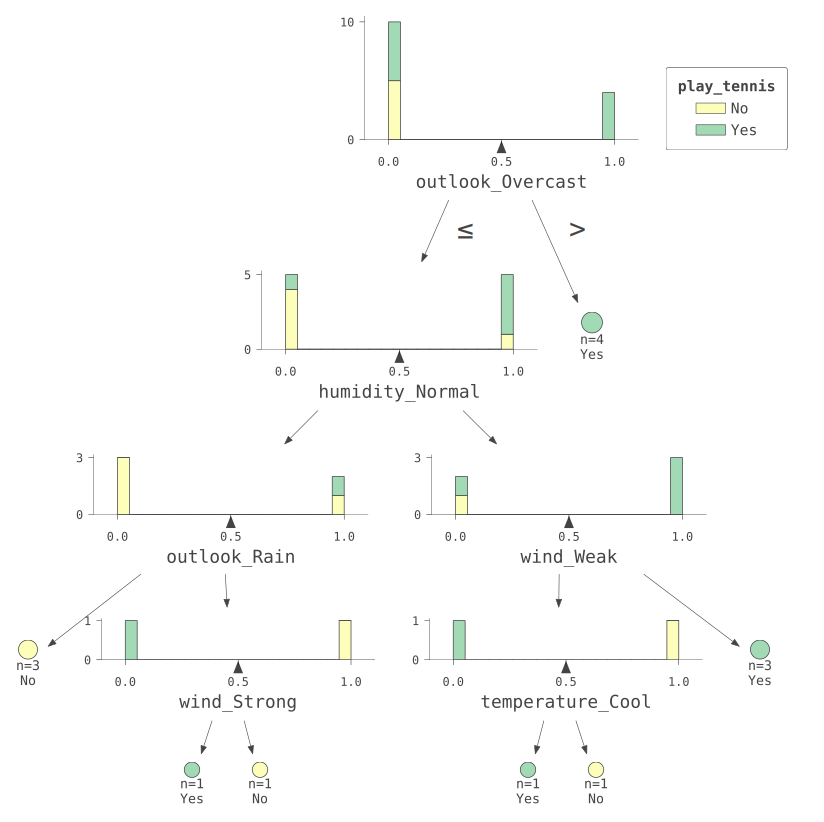

In [5]:
import dtreeviz

viz = dtreeviz.model(dt, X, y,
                     target_name="play_tennis",
                     feature_names=X.columns,
                     class_names=["No", "Yes"])
viz.view(fontname="monospace", scale=2.0)

In [6]:
from sklearn.model_selection import train_test_split

repository = "https://github.com/lmassaron/ml4dummies_3ed/"
release = "releases/download/v1.0/"
filename = repository + release + "titanic.csv"
titanic = pd.read_csv(filename)

X = titanic.iloc[:,:-1]
y = titanic.iloc[:,-1]

(X_train, X_test,
 y_train, y_test) = train_test_split(X, y, test_size=0.25,
                              random_state=0, shuffle=True)

In [7]:
dt = DecisionTreeClassifier(min_samples_split=5,
                            random_state=0)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)

print(f"test accuracy: {accuracy:0.3f}")


test accuracy: 0.774


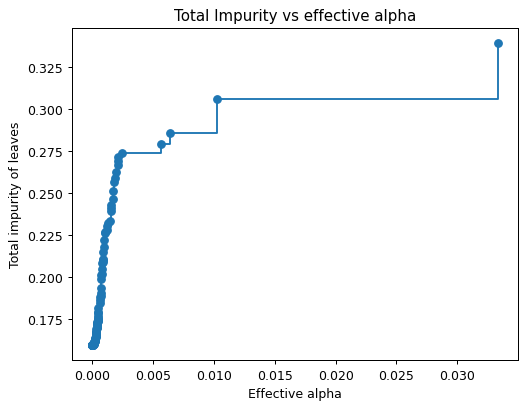

In [8]:
import matplotlib.pyplot as plt

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(dpi=90)
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o",
        drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha")
plt.show()

In [9]:
best_pruning = list()
for ccp_alpha in ccp_alphas:
    if ccp_alpha > 0:
        dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        dt.fit(X_train, y_train)
        best_pruning.append([ccp_alpha, dt.score(X_test, y_test)])

best_pruning = sorted(best_pruning,
                      key=lambda x:x[1], reverse=True)

best_ccp_alpha = best_pruning[0][0]
dt = DecisionTreeClassifier(random_state=0,
                            ccp_alpha=best_ccp_alpha)
dt.fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)

print(f"Test accuracy: {accuracy:0.3f}")

print("Number of nodes in the last tree is: {} with ccp_alpha: {:0.3f}"
      .format(dt.tree_.node_count, best_ccp_alpha))

Test accuracy: 0.805
Number of nodes in the last tree is: 13 with ccp_alpha: 0.003


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


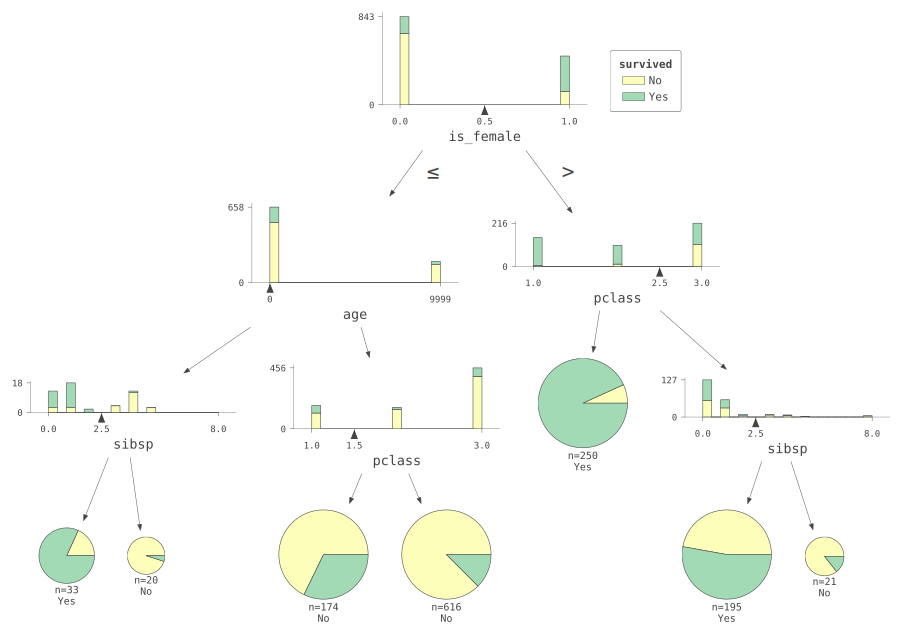

In [10]:
import dtreeviz

viz = dtreeviz.model(dt, X, y,
                     target_name="survived",
                     feature_names=X.columns,
                     class_names=["No", "Yes"],)

viz.view(fontname="monospace", scale=1.5)

In [11]:
print("Frequency Table (Outlook vs Play):")
pd.crosstab(tennis.outlook,
            tennis.play.replace({0: "NO", 1: "YES"}))

Frequency Table (Outlook vs Play):


play,NO,YES
outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [12]:
print("Conditional Probability P(Outlook | Play):")
pd.crosstab(tennis.outlook,
            tennis.play.replace({0: "NO", 1: "YES"}),
            normalize="columns")

Conditional Probability P(Outlook | Play):


play,NO,YES
outlook,,
Overcast,0.0,0.444444
Rain,0.4,0.333333
Sunny,0.6,0.222222


In [13]:
prob_outcomes = tennis.play.value_counts(sort=False, normalize=True)

outlook = pd.crosstab(tennis.outlook, tennis.play,
                      normalize="columns")
temperature = pd.crosstab(tennis.temperature, tennis.play,
                          normalize="columns")
humidity = pd.crosstab(tennis.humidity, tennis.play,
                       normalize="columns")
wind = pd.crosstab(tennis.wind, tennis.play,
                   normalize="columns")

In [14]:
proba = prob_outcomes
proba *= outlook.loc["Sunny"]
proba *= temperature.loc["Mild"]
proba *= humidity.loc["Normal"]
proba *= wind.loc["Weak"]
print(proba)

play
0    0.006857
1    0.028219
Name: proportion, dtype: float64


In [15]:
repository = "https://github.com/lmassaron/ml4dummies_3ed/"
release = "releases/download/v1.0/"
filename = repository + release + "spam.csv"
spam = pd.read_csv(filename)

X = spam.iloc[:,:-1]
y = spam.iloc[:, -1]

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

preds = cross_val_predict(nb, X, y, cv=10, n_jobs=-1)

In [17]:
from sklearn.metrics import classification_report

cr = classification_report(y_true=y, y_pred=preds,
                  target_names=["non spam", "spam"])
print(cr)

              precision    recall  f1-score   support

    non spam       0.82      0.83      0.82      2788
        spam       0.73      0.72      0.73      1813

    accuracy                           0.79      4601
   macro avg       0.78      0.78      0.78      4601
weighted avg       0.79      0.79      0.79      4601

